<h1><b>Implementation and Evaluation of Otsu Thresholding</b></h1>


***


<h3><b>Abstract</b></h3>
<p style = 'text-align : justify;'>



This project deals with  Otsu's thresholding, which is a common image segmentation method.
Using different preprocessing methods and Otsu's thresholding variations the segmentation for 3 different datasets (N2DH-GOWT1, N2DL-HeLa, NIH3T3) was analyzed to achieve the best thresholding. For preprocessing median filter, gaussian filter and histogram stretching were used. For thresholding we applied the global otsus´s thresholding, two-level Otsu as well as local adaptive thresholding. The images were then compared with ground truth images using the Dice Score for the evaluation of the thresholding.
Each dataset has different challenges (reflections, noise, varying brightness), therefore they were individually considered. To find the best segmentation outcome the different combinations of preprocessing and otsu variations were applied, receiving the optimal combination for each dataset. Finally, we obtained the optimal thresholded images for each dataset using the individualized combination. 
</p>


***


<h3><b>Table of contents</b></h3>

1. Introduction  
2. Description of datasets   
2.1 N2DH-GOWT1  
2.2 N2DL-HeLa   
2.3 NIH3T3  
3. Methods   
3.1 Import of packages  
3.2 Preprocessing  
3.3 Thresholding  
3.4 Postprocessing 
3.5 Evaluation  
4. Results  
4.1 Global Otsu Thresholding  
4.2 Two-level Otsu Thresholding    
4.3 Local adaptive global Otsu Thresholding    
4.4 Local adaptive two-level Otsu Thresholding  
5. Discussion  
6. References  


*** 


<h2><b>1. Introduction</b></h2>
<p style = 'text-align : justify;'>

Image segmentation is a useful tool for the application in different areas for example medical image analysis( Minaee,S. et all. 2020). 
It aims to simplify an image so that it can be better and easier analyzed.Cell segmentation makes it more simple to determine cell boundaries precisely, which then helps to further examine cells in terms of their phenotype (e.g. cellsize, cellshape). Furthermore segmentation is useful to count the number of the cell nuclei and to better localize the cells.
Therefore insights into the characteristics of the cells in terms of cell migration and proliferation by using time-lapse microscopy can be gained (Ulman, V., et al. 2017). There are several different image segmentation algorithms for example Thresholding (Otsu, N. 1979), k-means clustering (Dhanachandra, N. et all. 2015) and Region growing (Nock, R. and Nielsen, F. 2004). Otsus thresholding is a simple segmentation method. The gray-scale image is binarized, meaning that the pixels are assigned to foreground and background dependent on the threshold. Thus pixels below the threshold are assigned to 1 and pixels above the threshold are assigned to 0. Otu's Thresholding allows for the selection of a threshold that seperates the two classes best automatically (Otsu, N., 1979). 
</p>


***


<h2><b>2. Description of datasets</b></h2>
<p style = 'text-align : justify;'>
The three different datasets (N2DH-GOWT1, N2DL-HeLa and NIH3T3) are publicly available standard datasets, which are provided to evaluate proposed algorithms such as nuclear segmentation algorithms. Each dataset embodies specific features, that could challenge and affect the efficiency of the developed nuclei segmentation algorithm. In addition, for each dataset the corresponding ground truth images are provided, which show the 'true' segmentation and are used as reference images to quantify the accuracy of the final segmentation output.
</p>
<br>
<h4><b>2.1 N2DH-GOWT1</b></h4>
<p style = 'text-align : justify;'>
The datset N2DH-GOWT1 of the cell tracking challenge contains 6 images, showing GFP transfected mouse (<I>Mus musculus</I>) embryonic stem cells. These images were captured using a confocal microscope system (Leica TGS SP5). Moreover, the images have a size of 1024x1024 pixels and an approximate cell nuclei count of 10 to 20 per image. To visualize the cell nuclei, the transcription factor Oct4 was tagged with GFP. However, unstained regions (holes) can be identified within the cell nuclei, which can be attributed to the fact that Oct4 is only located in the nulei and not in the nucleolus (Bártová <I>et al.</I>, 2011). This might not influence the thresholding algorithm itself, but further evaluation and comparison to the ground truth images. The main challenge of this dataset is varying brightness within the cell nuclei as well as partly low contrast to the background and noise. Without further image preprocessing the semgmentation algorithm might fail to distinguish all cell nuclei correctly from the background.
</p>
<br>
<h4><b>2.2 N2DL-HeLa </b></h4>
<p style = 'text-align : justify;'>
The N2DL-Hela dataset of the cell tracking challenge contains 4 images, showing human (<I>Homo sapiens</I>) epithelial cells of cervical cancer. These images were captured using an Olympus IX81 microscope. Furthermore, the images have a size of 1100x700 pixels and contain an average of 30-50 cell nuclei per image. The cells are modified to stably express H2b-GFP in order to visualize the cell nuclei (Neumann <I>et al.</I>, 2010). For this dataset the segmentation algorithm is challenged by varying brigthness of the cell nuclei.
</p>
<br>
<h4><b>2.3 NIH3T3</b></h4>
<p style = 'text-align : justify;'>
The NIH3T3 dataset contains 18 images, showing mouse <I>Mus musculus</I>) emryonic fibroblast cells. These images were captured using fluorescence microscopy, have a size of 1344x1024 pixels and contain about 60 cell nuclei per image. To visualize the cell nuclei, Hoechst was used as a staining method (Coelho <I>et al.</I>, 2009). This dataset embodies challenging features like bright spots and reflectations as well as non-uniformal background, which might disturb the segmentation algorithm in a strong way.
</p>


***


<h2><b>3. Methods</b></h2>
<h3><b>3.1 Packages</b></h3>

In [1]:
# Import of modules

path = (os.path.abspath(os.path.join(r'.', os.pardir)))
import sys
sys.path.append(path)
from nuclei_segmentation import complete_analysis as ca
from nuclei_segmentation import preprocessing as pp
from matplotlib import pylab, mlab
from IPython.core.pylabtools import figsize, getfigs
from pylab import *


<h3><b>3.2 Preprocessing</b></h3>
For each dataset different preprocessing methods were used in order to evaluate the best dice score possible. It is necessary to find the optimal filtersize and combination of processing methods in order to receive the best possible filtering result. Thus for our project the optimal filtersize has been worked out by comparing the Dice scores for various different filtersizes.
<br>
<h4><b>Gaussian filter</b></h4>
<p style = 'text-align : justify;'>
The gaussian filter is a linear filter, meaning that convolution is necessary. With the gaussian filter, the noise is reduced by weighting of the different pixels. Thus the central pixel is rated the highest. The noise is reduced, however the edges become blurred as the signal gets distorted. It is therefore not suitable against impulsive noise.  It is most suitable when the noise is gaussian distributed. The larger the filtersize the more the image gets smoothed, however, edges will be blurred to a larger extent. Therefore a larger filtersize will result in removing of more noise, however edges will become more blurred. The formular for the 2-dimensional filter can be seen subsequently (Deng, G. and Cahill, W. 2002 and Mark S. Nixon, S. M. and Aguado, A.S. 2002) (zweites istbuchquelle anders zitieren?)
</p>

$$ G_σ(x,y) = \frac{1}{σ^2 2π}e^\frac{-(x^2+y^2)}{2σ^2}$$

σ^2: variance
<br>
<br>
<br>
<h4><b>Median filter</b></h4>
<p style = 'text-align : justify;'>
The median filter is a non linear filter, thus convolution is not necessary. 
Here the pixels in the NxN neighbourhood are ranked and the median value replaces the intensity of the central pixel.
This filter is suitable for impulsive noise (Salt-and-Pepper-noise) and allows to retain edges.
It is not suitable for gaussian noise. (Mark S. Nixon, S. M. and Aguado, A.S. 2002)
</p>
<br>
<br>
<br>
<h4><b>Histogram stretching</b></h4>
<p style = 'text-align : justify;'>
Histogram stretching, also known as histogram normalisation, can be used to enhance the contrast. The image is stretched, so the whole range of the pixel intensity values (e.g. 0-256) are used. This method is especially useful for images with a restricted range of pixel intensities. It is not useful, if the pixels that correspond to the minimum and maximum of the range are already present (Mark S. Nixon, S. M. and Aguado, A.S. 2002).
</p>

$$g(x,y) = \frac{f(x,y)-0}{255-0}*255$$

<br>
<br>
<br>
<br>


***


<h3><b>3.3 Thresholding</b></h3>
<h4><b>Global Otsu Thresholding</b></h4>
<p style = 'text-align : justify;'>
Automatic threshold selection respresents a fundamental biulding block for image processing and segmentation. By selecting a threshold of gray level, the image can be separated into two classes: pixels with a lower intensity and pixels with a higher intensity than the threshold value. In this case, global thresholding algorithms use a single threshold globally for the whole image to separate foreground and background. Ideallly, the histogram of an image shows a bimodal distribution, so that the threshold value can be choosen at the bottom of the valley between two peaks, respresenting foreground and background. Since this is rarely the case in reality, optimal thresholding can be achieved by performing Otsu's method.
Otsu thresholding is a non-parametric and unsupervised method of automatic threshold selection for picture segmentation, which uses the entire image to calculate the optimal threshold intensity in an automatic fashion. The algorithm iterates over all possible threshold intensity values and computes the between-class variance for each. The between-class variance <I>σ<sup>2</sup><sub>B</sub></I> is calculated from the probabilities of class occurance <I>ω<sub>i</sub></I>, the class mean levels <I>μ<sub>i</sub></I> and the total mean level <I>μ<sub>T</sub></I>. Finally, the intensity value, that maximizes the between-class variance and thus separates the image in two compact classes, is selected as optimal threshold intensity value (Otsu, 1979). 
</p>

$$σ^2_B = ω_0*ω_1(μ_1 - μ_0)^2$$

<p style = 'text-align : justify;'>
By assigning each pixel to the foreground or background depending on the calculated optimal threshold value, a segmented and binary image can be received,using image clipping. Pixels with lower or equal intensity values than the selected threshold value <I>T</I> are set to 0 (background) and equivalently pixels with higher intensity values than the optimal threshold value <I>T</I> are set to 1 (foreground).
</p>

$$I_{seg}(x,y)=\left\{\begin{array}{ccc} 0&if&I(x,y)  \leq T \\ 1&if&I(x,y) > T \end{array}\right.$$

<br>
<br>
<br>
<h4><b>Two-level Otsu Thresholding</b></h4>
<p style = 'text-align : justify;'>
Otsu thresholding is not selective for bright spots, reflections or artifacts, which arise from the image acquisition process and data transmission during microscopy. As a reason for that, pixels are assigned incorrectly to the foreground and thus identified falsely as cell nuclei. To solve this problem, Otsu's method can be extended to multithreshold problems, respectively two-level Otsu thresholding can be performed. The fundamental principle is to set two threshold values, which divide the image into three pixel classes (Otsu, 1979). The optimal set of threshold values is determined by maximizing the between-class variance between the three pixel classes as followed:
</p>
  
$$σ^2_B = ω_0*ω_1(μ_1 - μ_0)^2 + ω_0*ω_2(μ_2 - μ_0)^2 + ω_1*ω_2(μ_2 - μ_1)^2$$
  
<p style = 'text-align : justify;'>
The higher threshold intensity value is used to remove the bright spots and reflections from the original image, whereas the lower threshold value separates the cell nuclei from the background. In order to receive a binary image, all pixels with a lower or equal intensity level than the lower threshold value as well as all pixels with a higher intensity value than the upper threshold value are set to 0 (background). The remaining pixels, in rage between the lower and upper threshold value, are converted to 1 (foreground). Furthermore, two-level Otsu thresholding can be used to segment images in which the objects, such as cell nuclei, can be divided into two groups in terms of their intensity values. These features are represented in the images of the N2DH-GOWT1 dataset, in which the cell nuclei seem to be distributed at two different levels. Ideally, the two thresholds would separate the cell nuclei from eachother, but also from the background. In this case, all pixels with a higher intensity level than the lower threshold and all pixels with a higher intensity level than the upper threshold are set to 1. The pixels with a lower or equal intensity value than the lower threshold are set to 0.
</p>
<br>
<br>
<br>
<h4><b>Local Adaptive Otsu Thresholding</b></h4>
<p style = 'text-align : justify;'>
Although, global Otsu thresholding is very fast and provides reliable results in most cases, it is susceptible to non-uniformal illumination, considerable background noise and varation in contrast (Singh <I>et al.</I>, 2011). As a reason for that, pixels can not be clearly assigned to the foreground or background, which results in improperly segmented images. In order to overcome this problem, the implemented global segmentation method can be extended to local tresholding, being a more appropriate and accurate binarization method. Local Otsu thresholding uses non-overlapping windows to divide the original image into a distinct number of regions and to determine the optimal threshold of each. Due to contrast and illumination variation even in small regions especially in the NIH3T3 dataset, local adaptive Otsu thresholding, using overlapping windows, is performed. The key idea is to use a sliding window, a rectangular frame of a fixed size, which iterates over the image and calculates a unique threshold value for each iteration by Otsu thresholding. This implicates, that during the stepwise iteration multiple threshold values are calculated for each pixel, depending on the grayscale information of its local neighbourhood. To assign each pixel to the foreground or background, two possible options were elaborated. On one hand, the optimal threshold intensity value can be determined by averaging the threshold values, which were assigned to the pixel. By performing image clipping afterwards, a binary and segmented image can be received. On the other hand, each pixel can be assigned to the foreground or background, by counting to what the pixel has been assigned to more often. The latter algorithm was optimized by introducing sensitivity.  
</p>

$$A = \frac{F}{F+B}$$

<p style = 'text-align : justify;'>
To achieve efficiency and accuracy it is important to select the right stepsize and framesize. Since the calculation of the threshold value from the local neighbourhood is to be applied to each frame as a separate image, local adaptive thresholding algorithms are slower than global thresholding algorithms. To remove reflections and bright spots espacially in the NIH3T3 dataset, local adaptive thresholding, using two-level Otsu thresholding instead of global Otsu thresholding, can be aplied.
</p>


***


<h3><b>3.4 Postprocessing</b></h3>
<h4><b>Hole filling</b></h4>
<p style = 'text-align : justify;'>
As described above, the cell nuclei in the images of N2DH-GOWT1 show unstained regions (holes), identified as nucleolus. These holes have similar intensity values to the background, which makes it impossible for the thresholding algorithm to identify these regions as part of the cell nuclei. As a reason for that these pixels are falsely assigned to the background, which influcences further evaluation and comparison to the ground truth images. As a solution for that a hole filling algorithm, provided by OpenCV, can be performed as postprocessing method. Starting from the thresholded binary image, the algorithm performs flood filling, which captures areas of contiguous pixels of a similar intenisty value (background) and sets them to 1. After that the flood filled is inverted and the pixels beloning to background as well as cell nuclei are set to 0, where as the pixels belonging to the nucleoluses (holes) are converted to 1. Lastly, the thresholded binary image is combined with the inverted flood filled image to obtain the final output image with the holes filled in.
</p>


***


<h3><b>3.5 Evaluation</b></h3>
<h4><b>Dice Score</b></h4>
<p style = 'text-align : justify;'>


***


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


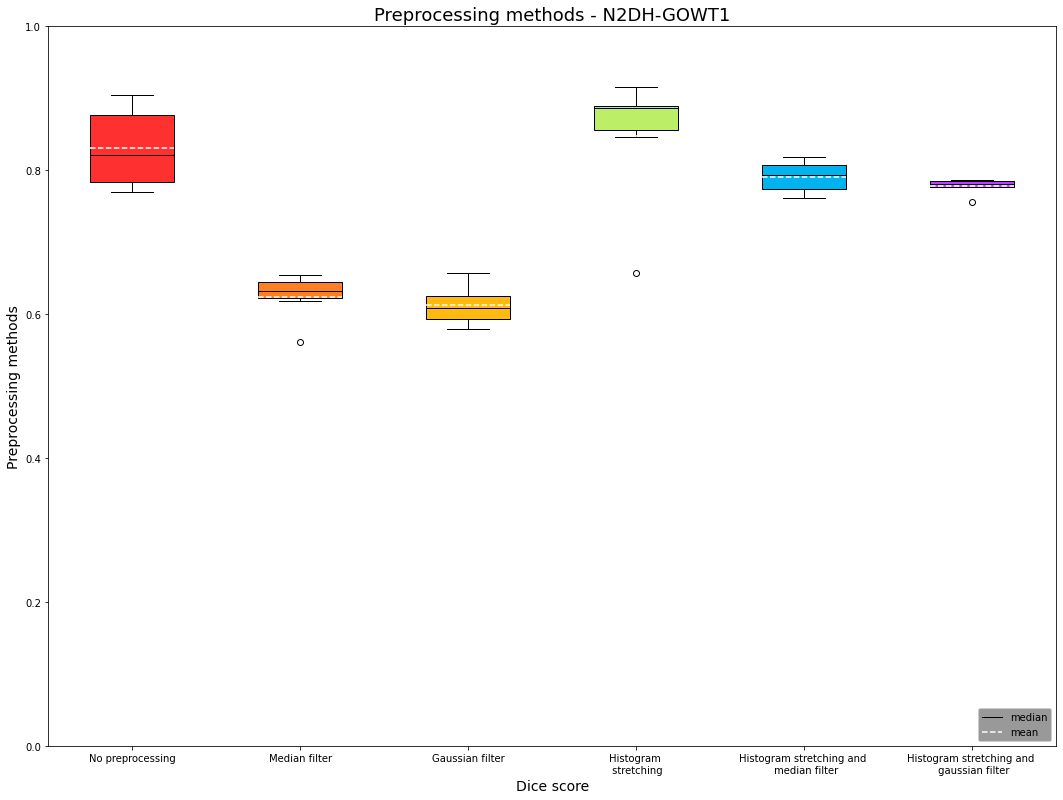

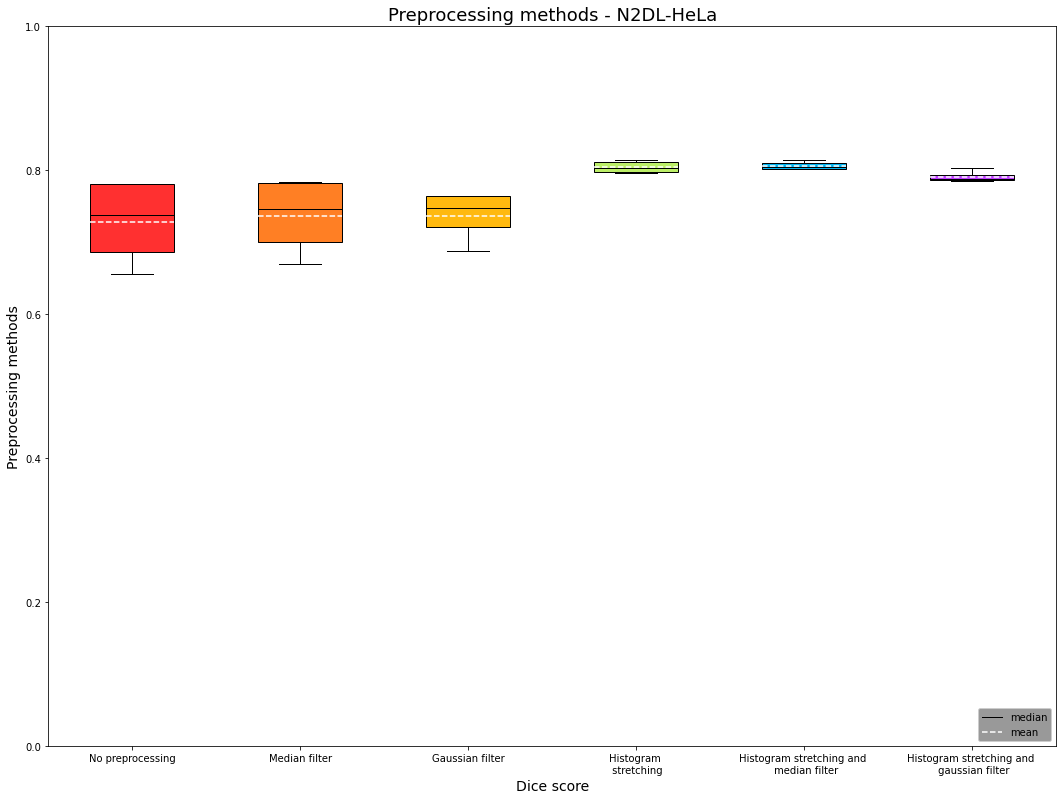

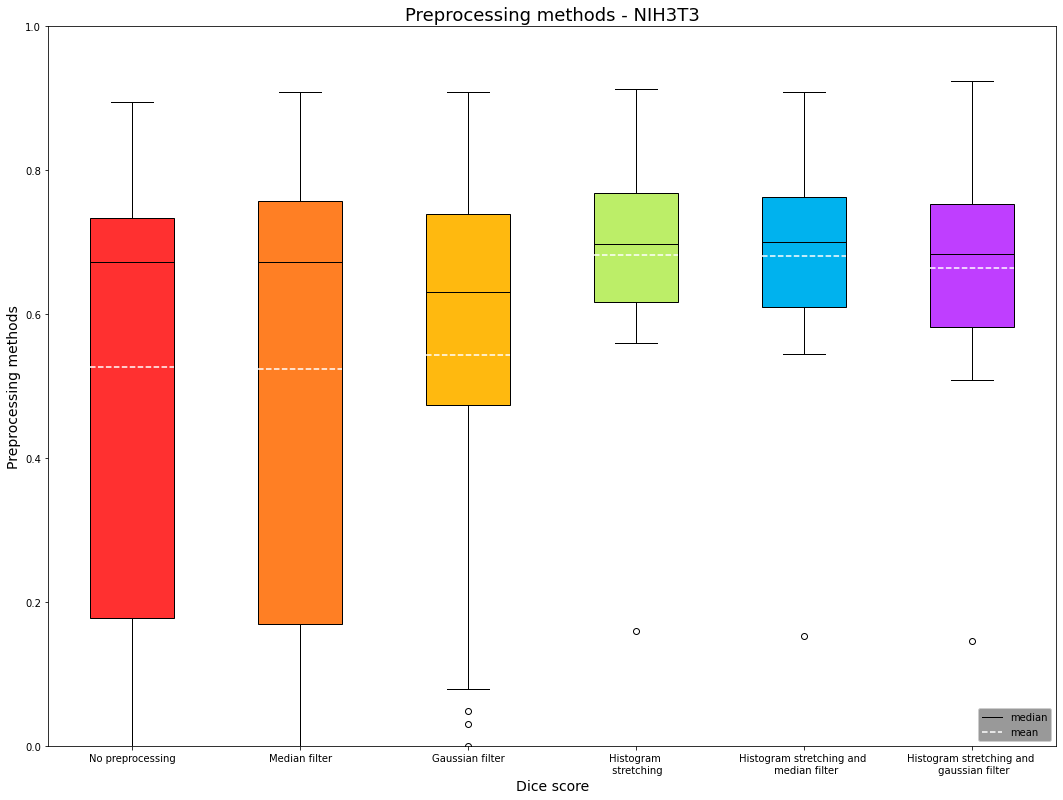

In [3]:
# Perform global Otsu Thresholding for each dataset
ca.complete_analysis_global_otsu_all('all')

c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


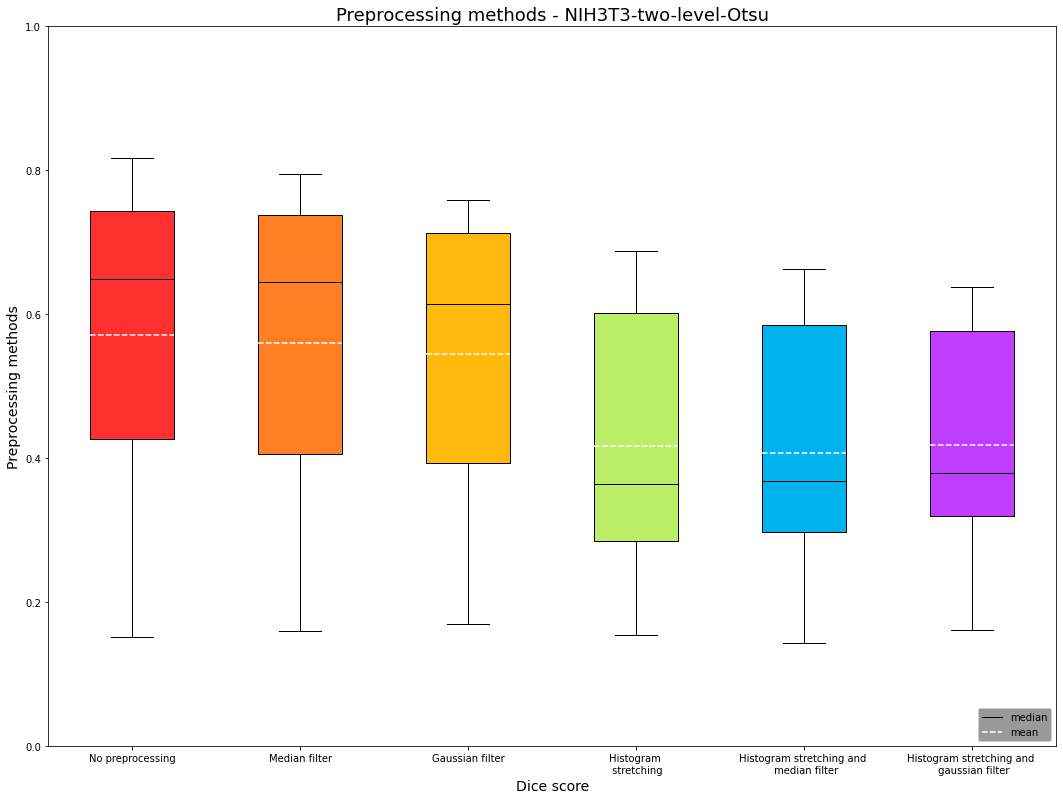

In [3]:
ca.complete_analysis_two_level_clip()

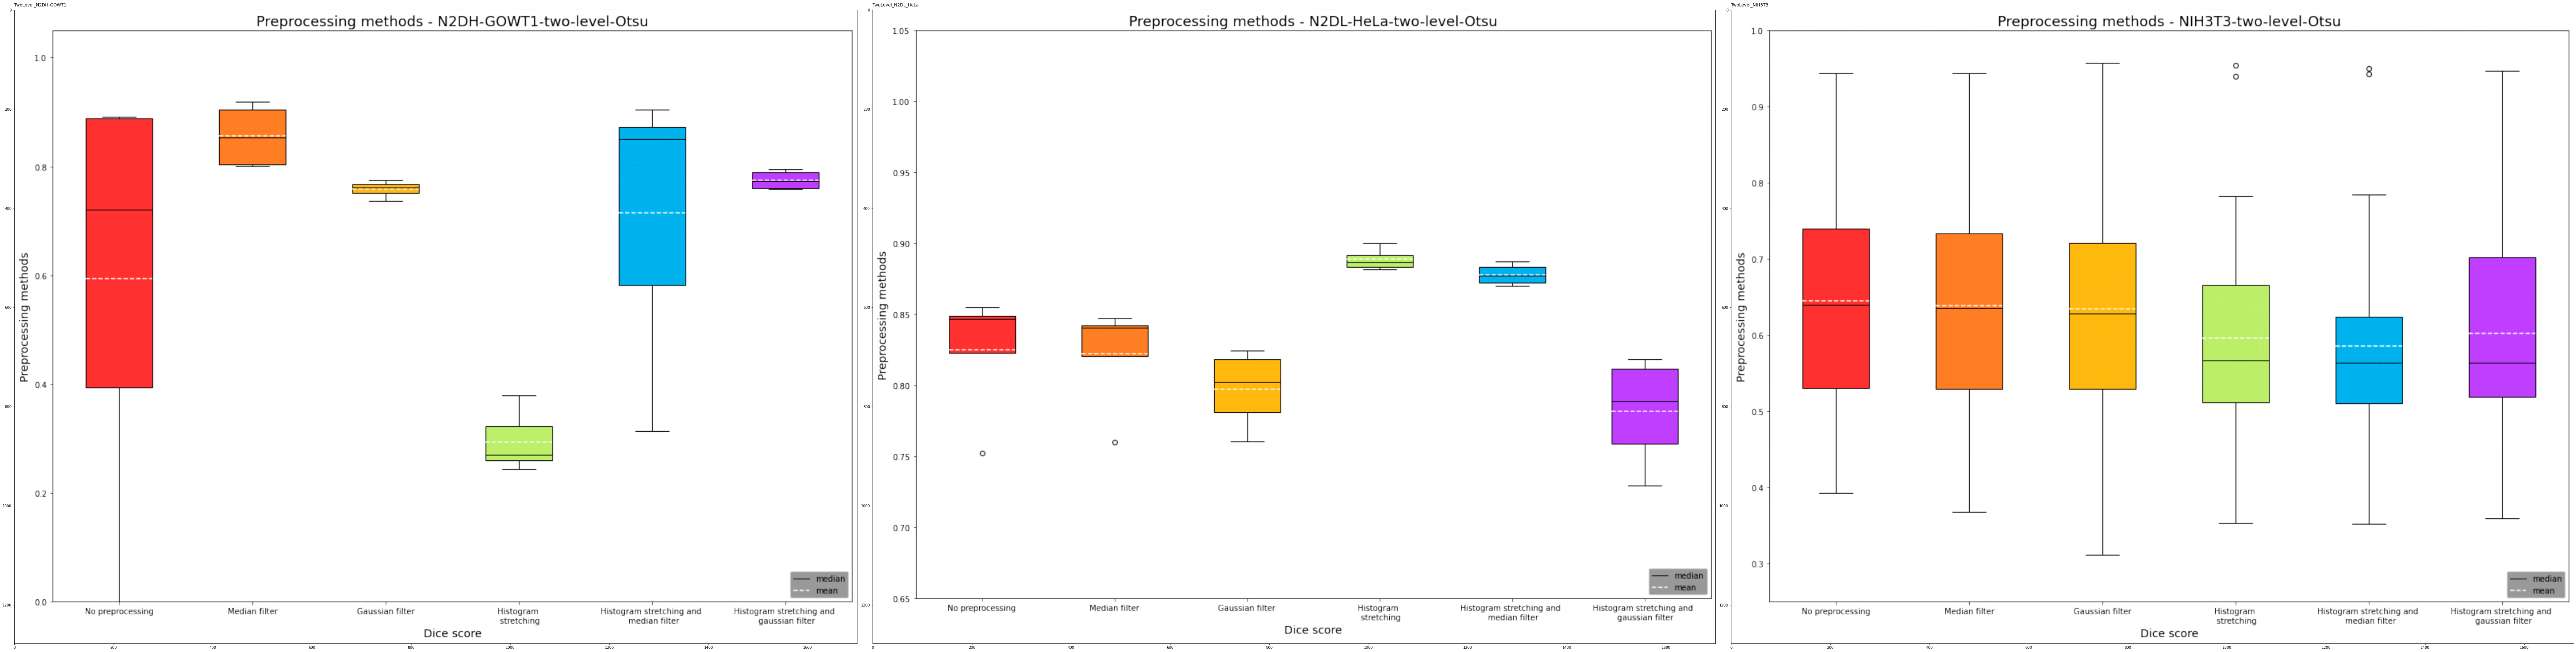

In [2]:

image1 = imread(r'Outputs_Boxplots/Output_TwoLevel_N2DH-GOWT1_ohneholefilling bei histogram stretching.png')
image2 = imread(r'Outputs_Boxplots/Output_TwoLevel_HeLa.png')
image3 = imread(r'Outputs_Boxplots/Output_TwoLevel_NIH3T3.png')

pp.subplot(image1,image2,image3,'TwoLevel_N2DH-GOWT1', 'TwoLevel_N2DL_HeLa', 'TwoLevel_NIH3T3')
